In [1]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

ModuleNotFoundError: No module named 'torch'

In [1]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6697526877758853863
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9486102528
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2618052326839482882
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [1]:
! nvidia-smi -q


==============NVSMI LOG==============

Timestamp                                 : Wed Aug 10 14:20:30 2022
Driver Version                            : 516.93
CUDA Version                              : 11.7

Attached GPUs                             : 1
GPU 00000000:01:00.0
    Product Name                          : NVIDIA GeForce RTX 3080
    Product Brand                         : GeForce
    Product Architecture                  : Ampere
    Display Mode                          : Enabled
    Display Active                        : Enabled
    Persistence Mode                      : N/A
    MIG Mode
        Current                           : N/A
        Pending                           : N/A
    Accounting Mode                       : Disabled
    Accounting Mode Buffer Size           : 4000
    Driver Model
        Current                           : WDDM
        Pending                           : WDDM
    Serial Number                         : N/A
    GPU UUID              

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15928279952039831577
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9482612736
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3197302096822166749
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [ ]:
trans=transforms.Compose([transforms.Resize((100,100)),
                          transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                          ])


trainset=torchvision.datasets.ImageFolder(root="C:\Data\screw",
                                           transform=trans)

In [ ]:
trainset.__getitem__(18)

(tensor([[[ 0.2314,  0.2549,  0.1843,  ..., -0.2627, -0.2549, -0.2549],
          [ 0.2157,  0.2784,  0.2157,  ..., -0.2706, -0.2941, -0.2314],
          [ 0.3020,  0.3098,  0.2157,  ..., -0.2863, -0.2863, -0.2392],
          ...,
          [ 0.0824, -0.1216, -0.1137,  ..., -0.5922, -0.5765, -0.5843],
          [ 0.0118, -0.0353, -0.0667,  ..., -0.5922, -0.5608, -0.5529],
          [-0.0902, -0.0275, -0.0980,  ..., -0.6157, -0.5451, -0.5216]],
 
         [[ 0.1216,  0.1373,  0.0745,  ..., -0.3412, -0.3412, -0.3333],
          [ 0.1059,  0.1608,  0.1059,  ..., -0.3490, -0.3804, -0.3176],
          [ 0.1765,  0.1922,  0.0980,  ..., -0.3647, -0.3647, -0.3333],
          ...,
          [-0.0118, -0.2235, -0.2235,  ..., -0.6549, -0.6549, -0.6549],
          [-0.0902, -0.1373, -0.1686,  ..., -0.6549, -0.6314, -0.6314],
          [-0.2000, -0.1216, -0.1922,  ..., -0.6784, -0.6235, -0.6078]],
 
         [[-0.1373, -0.1137, -0.1922,  ..., -0.5608, -0.5608, -0.5529],
          [-0.1529, -0.0902,

In [ ]:
len(trainset)

65

In [ ]:
classes=trainset.classes
classes

['adnormal', 'normal']

In [ ]:
trainloader=DataLoader(trainset,
                       batch_size=16,
                       shuffle=False,
                       num_workers=4
                       )

In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])


In [ ]:
def imshow(img):
    img=img/2+0.5
    np_img=img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

torch.Size([16, 3, 100, 100])
(3, 410, 410)
(410, 410, 3)
torch.Size([16, 3, 100, 100])
torch.Size([3, 206, 818])
adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  adnormal  normal  normal  normal  


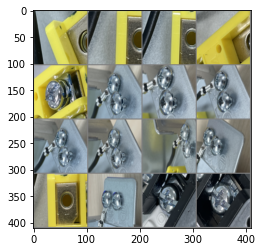

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s  "%classes[labels[j]] for j in range(16)))